[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   id                                         text sentiment
0   1                         I love this product!  positive
1   2  This is the worst thing I have ever bought.  negative
2   3             Absolutely fantastic experience.  positive
3   4                  Not happy with the service.  negative
4   5                It was okay, nothing special.   neutral
sentiment
positive    4
negative    4
neutral     2
Name: count, dtype: int64


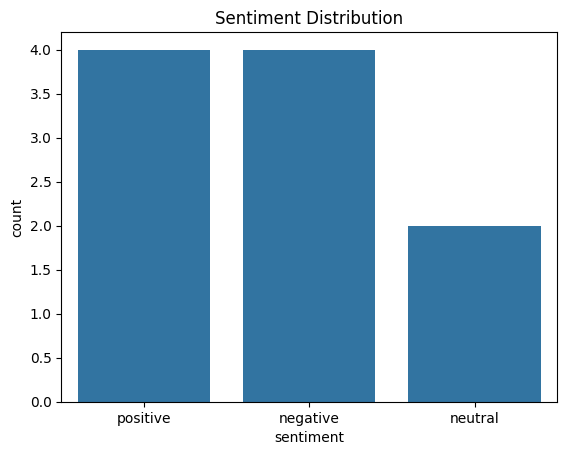

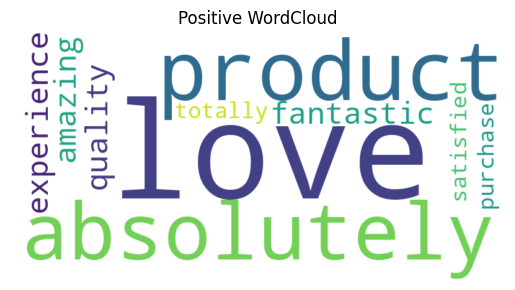

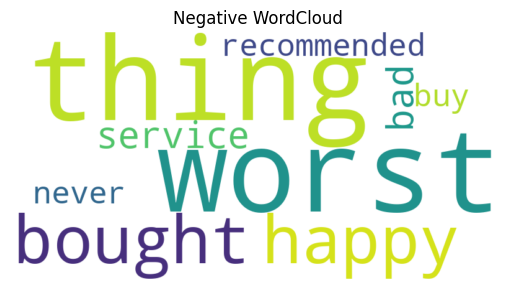

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import string

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load your CSV file
df = pd.read_csv('sentiment_data.csv')

# Show first few rows
print(df.head())

# Count sentiment values
print(df['sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# Clean text function
stop = stopwords.words('english')
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [w for w in words if w not in stop]
    return ' '.join(words)

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# WordCloud for Positive
positive_text = ' '.join(df[df['sentiment']=='positive']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive WordCloud")
plt.show()

# WordCloud for Negative
negative_text = ' '.join(df[df['sentiment']=='negative']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative WordCloud")
plt.show()